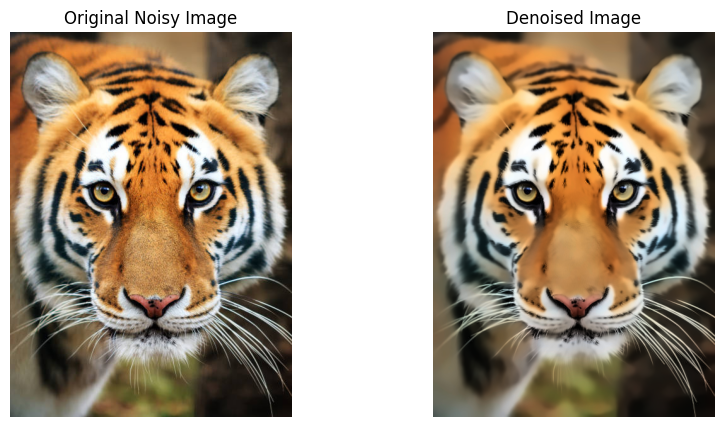

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
img = cv2.imread('tlab5.jpg')

# Denoising using OpenCV (Non-Local Means Denoising)
denoised_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

# Show original and denoised images
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Noisy Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image")
plt.axis('off')

plt.show()

# Optionally, save the result
cv2.imwrite('denoised_image.jpg', denoised_img)


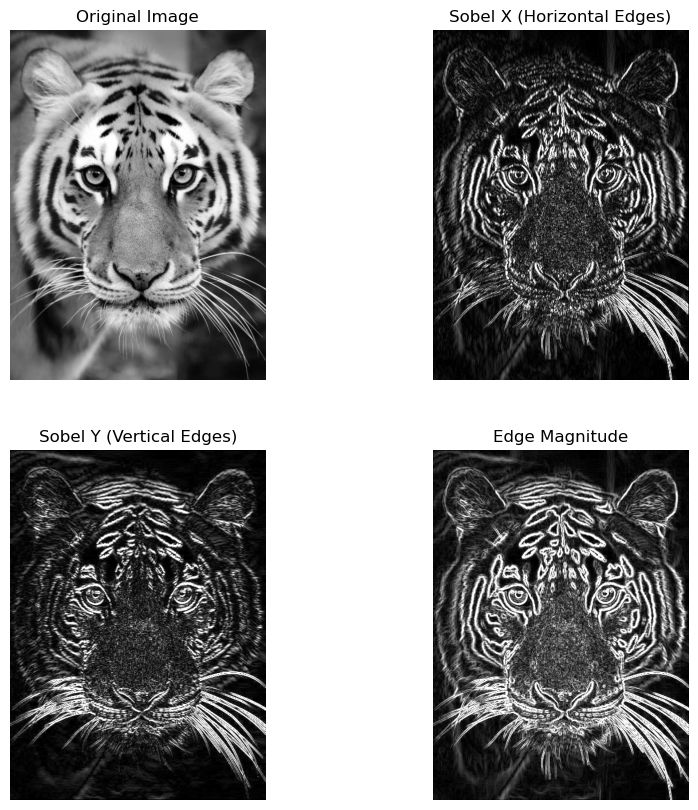

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread('tlab5.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    print("Error: Could not load image.")
else:
    # Apply Sobel edge detection in the X and Y directions
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in x direction (horizontal edges)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in y direction (vertical edges)

    # Calculate the magnitude of the gradients
    magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Convert back to 8-bit image
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    magnitude = cv2.convertScaleAbs(magnitude)

    # Display the results
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title("Sobel X (Horizontal Edges)")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title("Sobel Y (Vertical Edges)")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(magnitude, cmap='gray')
    plt.title("Edge Magnitude")
    plt.axis('off')

    plt.show()


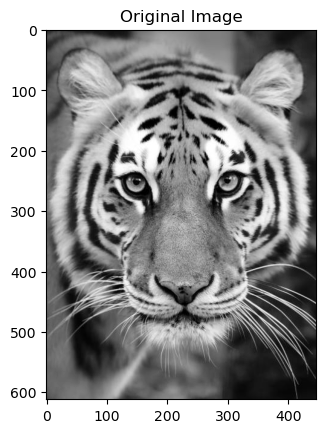

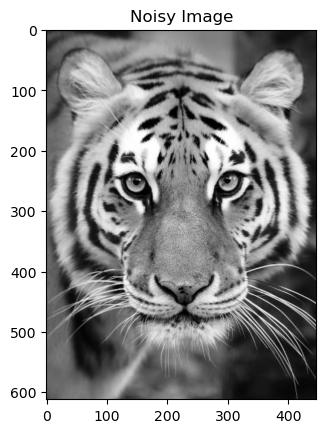

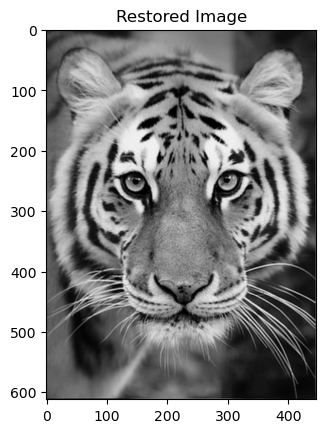

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load the image (example: noisy or blurred image)
image_path = 'tlab5.jpg'  # change to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image at {image_path} could not be loaded. Please check the file path.")

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Add noise (for simulation purpose)
def add_noise(image, noise_factor=0.2):
    row, col = image.shape
    noise = np.random.normal(0, noise_factor, (row, col))
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image

noisy_image = add_noise(image)

# Display noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.show()

# Wiener Filter Function
def wiener_filter(image, kernel, noise_variance, signal_variance):
    kernel_ft = np.fft.fft2(kernel, s=image.shape)
    image_ft = np.fft.fft2(image)
    
    # Wiener filter formula
    wiener_filter = np.conj(kernel_ft) / (np.abs(kernel_ft)**2 + (noise_variance / signal_variance))
    
    restored_ft = image_ft * wiener_filter
    restored_image = np.abs(np.fft.ifft2(restored_ft))
    return np.uint8(np.clip(restored_image, 0, 255))

# Define a simple blur kernel (e.g., motion blur or Gaussian)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9  # Simple averaging kernel (you can customize)

# Wiener filter parameters
noise_variance = 0.1  # Estimated noise variance
signal_variance = 0.3  # Estimated signal variance

# Apply Wiener filter
restored_image = wiener_filter(noisy_image, kernel, noise_variance, signal_variance)

# Display restored image
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image')
plt.show()


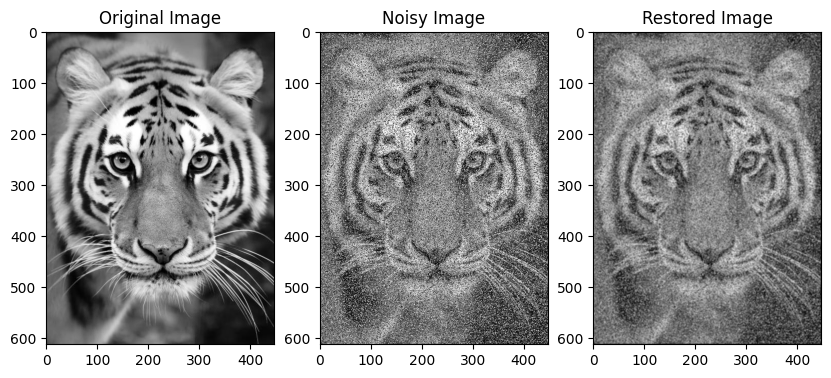

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_noise(image):
    noisy_image = image.copy()
    noise = np.random.randint(0, 256, image.shape, dtype='uint8')
    mask = np.random.randint(0, 2, image.shape, dtype='uint8')
    noisy_image[mask == 0] = noise[mask == 0]
    return noisy_image

def mean_filter(image, ksize=3):
    # Get the dimensions of the image
    h, w = image.shape
    # Create an empty image to store the restored image
    restored_image = np.zeros_like(image)
    # Define the padding size
    pad_size = ksize // 2
    # Pad the image with zeros on the borders
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Apply mean filtering
    for i in range(h):
        for j in range(w):
            # Extract the region of interest
            region = padded_image[i:i+ksize, j:j+ksize]
            # Compute the mean of the region
            mean_value = np.mean(region)
            # Assign the mean value to the restored image
            restored_image[i, j] = mean_value
    
    return restored_image

# Load your image
image_path = 'tlab5.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found!")

# Add noise to the image
noisy_image = add_noise(image)

# Apply mean filter to the noisy image
restored_image = mean_filter(noisy_image, ksize=3)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Restored Image')
plt.imshow(restored_image, cmap='gray')
plt.show()


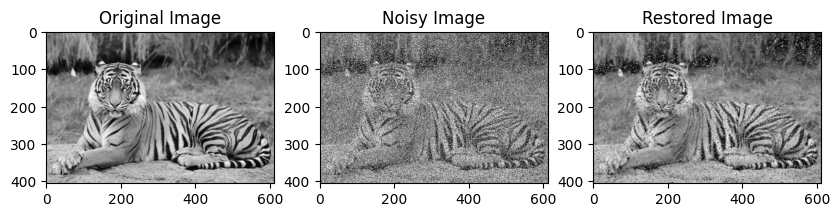

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_noise(image):
    noisy_image = image.copy()
    noise = np.random.randint(0, 256, image.shape, dtype='uint8')
    mask = np.random.randint(0, 2, image.shape, dtype='uint8')
    noisy_image[mask == 0] = noise[mask == 0]
    return noisy_image

def median_filter(image, ksize=3):
    # Apply median filtering
    restored_image = cv2.medianBlur(image, ksize)
    return restored_image

# Load your image
image_path = 'lab5.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found!")

# Add noise to the image
noisy_image = add_noise(image)

# Apply median filter to the noisy image
restored_image = median_filter(noisy_image, ksize=3)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Restored Image')
plt.imshow(restored_image, cmap='gray')
plt.show()


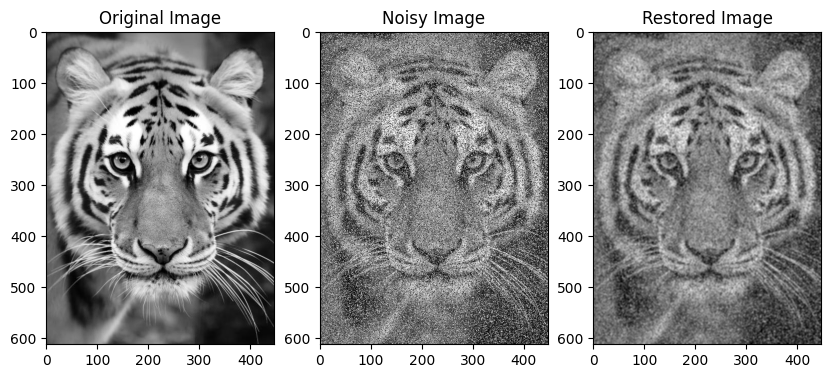

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_noise(image):
    noisy_image = image.copy()
    noise = np.random.randint(0, 256, image.shape, dtype='uint8')
    mask = np.random.randint(0, 2, image.shape, dtype='uint8')
    noisy_image[mask == 0] = noise[mask == 0]
    return noisy_image

def gaussian_filter(image, ksize=5, sigma=1.5):
    # Apply Gaussian filtering
    restored_image = cv2.GaussianBlur(image, (ksize, ksize), sigma)
    return restored_image

# Load your image
image_path = 'tlab5.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found!")

# Add noise to the image
noisy_image = add_noise(image)

# Apply Gaussian filter to the noisy image
restored_image = gaussian_filter(noisy_image, ksize=5, sigma=1.5)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Restored Image')
plt.imshow(restored_image, cmap='gray')
plt.show()
